# Controlling mesh resolution

## Coarse global resolution

The keyword arguments `default_resolution_min` and `default_resolution_max` set the minimum and maximum characteristic lengths used by `gmsh` when computing the mesh.

They are used when other resolutions are not provided, and `default_resolution_max` effectively sets the minimum length possible, since when conflicting resolution at a point are given, the smallest one is taken.

In [1]:
# %matplotlib widget

In [2]:
from itertools import product
import numpy as np
import gdsfactory as gf
from gdsfactory.simulation.gmsh.mesh import create_physical_mesh
from gdsfactory.technology import LayerStack, LayerLevel
from gdsfactory.pdk import get_layer_stack

import meshio
from skfem.io import from_meshio
from gdsfactory.generic_tech import get_generic_pdk

PDK = get_generic_pdk()
PDK.activate()
gf.config.rich_output()

waveguide = gf.components.straight_pin(length=10, taper=None)
waveguide_trimmed = gf.Component()
waveguide_trimmed.add_ref(
    gf.geometry.trim(
        component=waveguide,
        domain=[[3, -4], [3, 4], [5, 4], [5, -4]],
    )
)


filtered_layerstack = LayerStack(
    layers={
        k: get_layer_stack().layers[k]
        for k in (
            "slab90",
            "core",
            "via_contact",
        )
    }
)

filename = "mesh"
def mesh_with_physicals(mesh, filename):
    mesh_from_file = meshio.read(f"{filename}.msh")
    return create_physical_mesh(mesh_from_file, "triangle", prune_z=True)


2023-02-20 17:56:10.881 | INFO     | gdsfactory.config:<module>:50 - Load '/home/runner/work/gdsfactory/gdsfactory/gdsfactory' 6.43.1


2023-02-20 17:56:12.264 | INFO     | gdsfactory.technology.layer_views:__init__:785 - Importing LayerViews from YAML file: /home/runner/work/gdsfactory/gdsfactory/gdsfactory/generic_tech/layer_views.yaml.


2023-02-20 17:56:12.272 | INFO     | gdsfactory.pdk:activate:206 - 'generic' PDK is now active


With `default_resolution_max` set to 1 um and `default_resolution_min` set to 100 nm:

/usr/share/miniconda/envs/anaconda-client-env/lib/python3.9/site-packages/shapely/set_operations.py:133: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)
/usr/share/miniconda/envs/anaconda-client-env/lib/python3.9/site-packages/shapely/set_operations.py:133: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)
/usr/share/miniconda/envs/anaconda-client-env/lib/python3.9/site-packages/shapely/set_operations.py:133: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)
/usr/share/miniconda/envs/anaconda-client-env/lib/python3.9/site-packages/shapely/set_operations.py:133: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)
/usr/share/miniconda/envs/anaconda-client-env/lib/python3.9/site-packages/shapely/set_operations.py:133: RuntimeWarning: invalid value encountered in intersection
  return lib.inte

[]

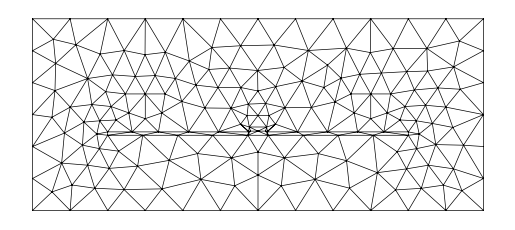

In [3]:
mesh = waveguide_trimmed.to_gmsh(
    type="uz",
    xsection_bounds=[(4, -4), (4, 4)],
    layer_stack=filtered_layerstack,
    filename=f"{filename}.msh",
    background_tag="oxide",
    background_padding=(2.0, 2.0, 2.0, 2.0),
    default_resolution_min=0.1,
    default_resolution_max=1,
)

mesh = mesh_with_physicals(mesh, filename)
mesh = from_meshio(mesh)
mesh.draw().plot()

With `default_resolution_max` set to 300 nm and `default_resolution_max` set to 50 nm:

/usr/share/miniconda/envs/anaconda-client-env/lib/python3.9/site-packages/shapely/set_operations.py:133: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)
/usr/share/miniconda/envs/anaconda-client-env/lib/python3.9/site-packages/shapely/set_operations.py:133: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)


/usr/share/miniconda/envs/anaconda-client-env/lib/python3.9/site-packages/shapely/set_operations.py:133: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)
/usr/share/miniconda/envs/anaconda-client-env/lib/python3.9/site-packages/shapely/set_operations.py:133: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)
/usr/share/miniconda/envs/anaconda-client-env/lib/python3.9/site-packages/shapely/set_operations.py:133: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)


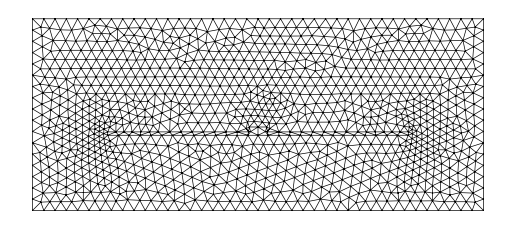

In [4]:
mesh = waveguide_trimmed.to_gmsh(
    type="uz",
    xsection_bounds=[(4, -4), (4, 4)],
    layer_stack=filtered_layerstack,
    filename=f"{filename}.msh",
    background_tag="oxide",
    background_padding=(2.0, 2.0, 2.0, 2.0),
    default_resolution_min=0.05,
    default_resolution_max=0.3,
)
mesh = mesh_with_physicals(mesh, filename)
mesh = from_meshio(mesh)
mesh.draw().show()

## Label-wise coarse resolution control

An advantage of finite-volume and finite-element schemes is the ability for different nodes to have different characteristics lengths.

This simply achieved to first order here by supplying a `resolutions` dict with keys referencing the `LayerStack` names, and for value a second dict with keys `resolution` and `distance` which control, respectively, the characteristic length within a region and the dropoff away from interfaces with this region.

For example, to refine within the core only, one could use:

/usr/share/miniconda/envs/anaconda-client-env/lib/python3.9/site-packages/shapely/set_operations.py:133: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)
/usr/share/miniconda/envs/anaconda-client-env/lib/python3.9/site-packages/shapely/set_operations.py:133: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)
/usr/share/miniconda/envs/anaconda-client-env/lib/python3.9/site-packages/shapely/set_operations.py:133: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)


/usr/share/miniconda/envs/anaconda-client-env/lib/python3.9/site-packages/shapely/set_operations.py:133: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)
/usr/share/miniconda/envs/anaconda-client-env/lib/python3.9/site-packages/shapely/set_operations.py:133: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)


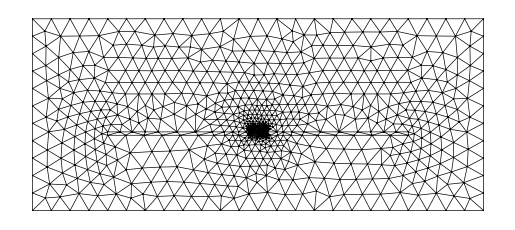

In [5]:
resolutions = {}
resolutions["core"] = {"resolution": 0.05, "distance": 0}

mesh = waveguide_trimmed.to_gmsh(
    type="uz",
    xsection_bounds=[(4, -4), (4, 4)],
    layer_stack=filtered_layerstack,
    filename=f"{filename}.msh",
    background_tag="oxide",
    background_padding=(2.0, 2.0, 2.0, 2.0),
    resolutions=resolutions,
)
mesh = mesh_with_physicals(mesh, filename)
mesh = from_meshio(mesh)
mesh.draw().show()

Adding a dropoff at the interface:

/usr/share/miniconda/envs/anaconda-client-env/lib/python3.9/site-packages/shapely/set_operations.py:133: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)
/usr/share/miniconda/envs/anaconda-client-env/lib/python3.9/site-packages/shapely/set_operations.py:133: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)
/usr/share/miniconda/envs/anaconda-client-env/lib/python3.9/site-packages/shapely/set_operations.py:133: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)
/usr/share/miniconda/envs/anaconda-client-env/lib/python3.9/site-packages/shapely/set_operations.py:133: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)
/usr/share/miniconda/envs/anaconda-client-env/lib/python3.9/site-packages/shapely/set_operations.py:133: RuntimeWarning: invalid value encountered in intersection
  return lib.inte

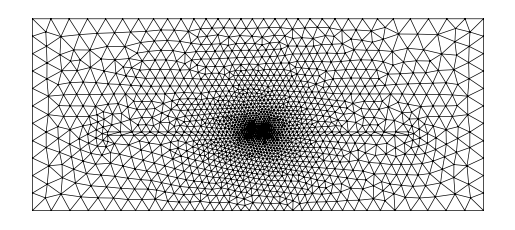

In [6]:
resolutions = {}
resolutions["core"] = {"resolution": 0.05, "distance": 5}

mesh = waveguide_trimmed.to_gmsh(
    type="uz",
    xsection_bounds=[(4, -4), (4, 4)],
    layer_stack=filtered_layerstack,
    filename=f"{filename}.msh",
    background_tag="oxide",
    background_padding=(2.0, 2.0, 2.0, 2.0),
    resolutions=resolutions,
)
mesh = mesh_with_physicals(mesh, filename)
mesh = from_meshio(mesh)
mesh.draw().show()

Refining multiple elements simultaneously:

/usr/share/miniconda/envs/anaconda-client-env/lib/python3.9/site-packages/shapely/set_operations.py:133: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)
/usr/share/miniconda/envs/anaconda-client-env/lib/python3.9/site-packages/shapely/set_operations.py:133: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)
/usr/share/miniconda/envs/anaconda-client-env/lib/python3.9/site-packages/shapely/set_operations.py:133: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)
/usr/share/miniconda/envs/anaconda-client-env/lib/python3.9/site-packages/shapely/set_operations.py:133: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)
/usr/share/miniconda/envs/anaconda-client-env/lib/python3.9/site-packages/shapely/set_operations.py:133: RuntimeWarning: invalid value encountered in intersection
  return lib.inte

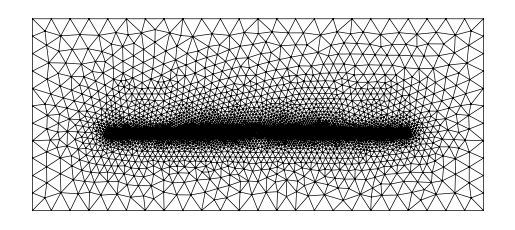

In [7]:
resolutions = {}
resolutions["core"] = {"resolution": 0.05, "distance": 1}
resolutions["slab90"] = {"resolution": 0.02, "distance": 1}
resolutions["via_contact"] = {"resolution": 0.2, "distance": 0}
resolutions["oxide"] = {"resolution": 1, "distance": 0}

mesh = waveguide_trimmed.to_gmsh(
    type="uz",
    xsection_bounds=[(4, -4), (4, 4)],
    layer_stack=filtered_layerstack,
    filename=f"{filename}.msh",
    background_tag="oxide",
    background_padding=(2.0, 2.0, 2.0, 2.0),
    resolutions=resolutions,
)
mesh = mesh_with_physicals(mesh, filename)
mesh = from_meshio(mesh)
mesh.draw().show()

## Fine mesh refinement

You can fine mesh refine with the `global_meshsize_array` (default `None`) and `global_meshsize_interpolant_func` (default `scipy.interpolate.NearestNDInterpolator`) arguments, which define the characteristic length callback used by gmsh to select characteristic lengths at a local level.

The `global_meshsize_array` has form [x,y,z,lc], with `x,y,z` in mesh units; here, `x` is `u` $\in$ [-2, 10] considering the y-coordinates of the xsection_bounds and the background padding, `y` $\in$ [-2,3], and `z` is always 0. These values could be estimated from the component bounding box.

In practice, this array would most likely result from a physical simulation using the simulation domain coordinates, which would also yield a higher quality mesh by virtue of being smoother.

For instance, if one wants to refine in a circle around the waveguide core, and have some asymmetry about the y-axis, a meshsize array like so could be defined:

/usr/share/miniconda/envs/anaconda-client-env/lib/python3.9/site-packages/shapely/set_operations.py:133: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)
/usr/share/miniconda/envs/anaconda-client-env/lib/python3.9/site-packages/shapely/set_operations.py:133: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)
/usr/share/miniconda/envs/anaconda-client-env/lib/python3.9/site-packages/shapely/set_operations.py:133: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)
/usr/share/miniconda/envs/anaconda-client-env/lib/python3.9/site-packages/shapely/set_operations.py:133: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)
/usr/share/miniconda/envs/anaconda-client-env/lib/python3.9/site-packages/shapely/set_operations.py:133: RuntimeWarning: invalid value encountered in intersection
  return lib.inte

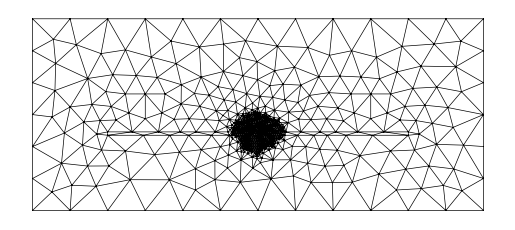

In [8]:
xs = np.linspace(-2, 10, 800)
ys = np.linspace(-2, 3, 800)
global_meshsize_array = []

ls_large = 1
ls_small = 0.05

r = 0.75
for x, y in product(xs, ys):
    if (x - 4.0) ** 2 + (y) ** 2 <= r**2:
        global_meshsize_array.append([x, y, 0, ls_small])
    else:
        global_meshsize_array.append([x, y, 0, ls_large])

global_meshsize_array = np.array(global_meshsize_array)

mesh = waveguide_trimmed.to_gmsh(
    type="uz",
    xsection_bounds=[(4, -4), (4, 4)],
    layer_stack=filtered_layerstack,
    filename=f"{filename}.msh",
    background_tag="oxide",
    background_padding=(2.0, 2.0, 2.0, 2.0),
    global_meshsize_array=global_meshsize_array,
    default_resolution_min=ls_small,
    default_resolution_max=ls_large,
)
mesh = mesh_with_physicals(mesh, filename)
mesh = from_meshio(mesh)
mesh.draw().show()